In [154]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm as tqdm
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
with open("random_nfa_from_matrices.pkl", "rb") as fd:
    data = pickle.load(fd)
df = pd.DataFrame(data)
df["density"] = df.accepted_counts.map(lambda x: [xi / 2**i for i,xi in enumerate(x, 1)])
df["last_density"] = df.density.map(lambda x: x[-1])
df["last_count"] = df.accepted_counts.map(lambda x: x[-1])
df["probably_exp"] = df.density.map(lambda x: (x[-2] - x[-1]) < 1e-6 and x[-1] > 0)

In [3]:
df

,sparsity,matrix,accepted_counts,height,density,last_density,last_count,probably_exp
0,0.576617,"[[0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",inf,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0,False
1,0.518914,"[[0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 0], [...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0,False
2,0.616396,"[[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...","[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 204...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,32768,True
3,0.913391,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...","[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144,...",inf,"[0.0, 0.25, 0.125, 0.125, 0.09375, 0.078125, 0...",0.011505,377,False
4,0.829754,"[[0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",inf,"[0.5, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015...",0.000061,2,False
...,...,...,...,...,...,...,...,...
78395,0.645901,"[[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...","[2, 4, 6, 12, 22, 40, 70, 120, 202, 336, 554, ...",inf,"[1.0, 1.0, 0.75, 0.75, 0.6875, 0.625, 0.546875...",0.119568,3918,False
78396,0.738355,"[[0, 0, 1], [0, 0, 0], [1, 0, 0], [0, 0, 0], [...","[2, 3, 4, 6, 9, 14, 22, 35, 56, 90, 145, 234, ...",inf,"[1.0, 0.75, 0.5, 0.375, 0.28125, 0.21875, 0.17...",0.030151,988,False
78397,0.887703,"[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",0.0,"[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, ...",0.000031,1,False
78398,0.712235,"[[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0], [1, 1...","[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 204...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",1.000000,32768,True


<AxesSubplot:xlabel='sparsity', ylabel='last_density'>

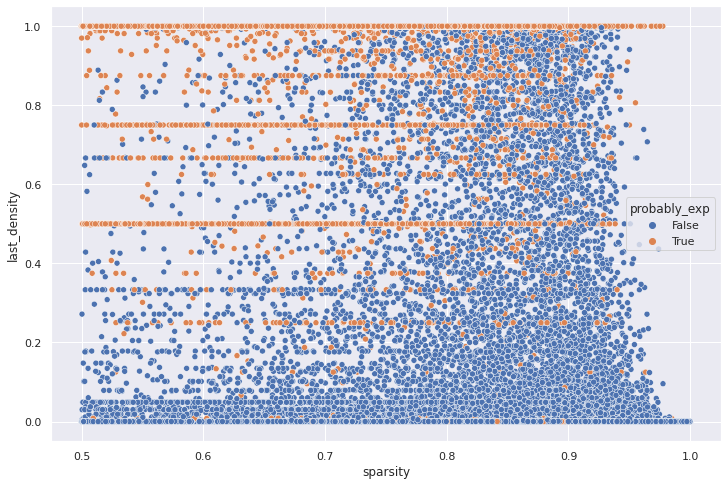

In [4]:
sns.scatterplot(data=df, x="sparsity", y="last_density", hue="probably_exp")

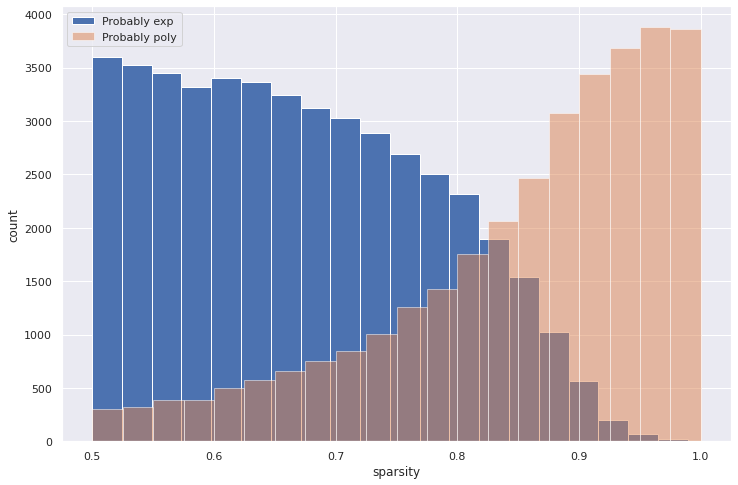

In [5]:
df[df.probably_exp == True].sparsity.hist(bins=20, label="Probably exp")
df[df.probably_exp == False].sparsity.hist(bins=20, alpha=0.5, label="Probably poly")
plt.legend()
plt.xlabel("sparsity")
plt.ylabel("count");

Text(0.5, 1.0, 'Moving average of last density for exp/poly. 300 periods')

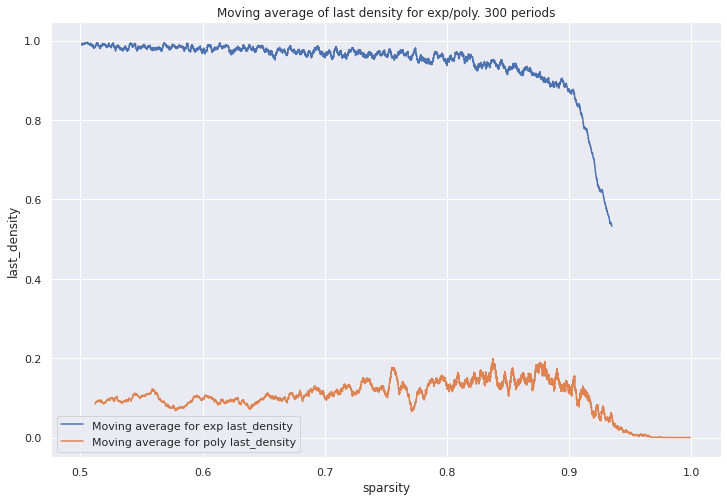

In [6]:
window = 300
ax = (
    df[df.probably_exp == True]
    .sort_values(by="sparsity")
    .rolling(window=window)
    .mean()
    .plot(x="sparsity", y="last_density", label="Moving average for exp last_density")
)
df[df.probably_exp == False].sort_values(by="sparsity").rolling(window=window).mean().plot(
    x="sparsity", y="last_density", ax=ax, label="Moving average for poly last_density"
)
plt.ylabel("last_density");
plt.title(f"Moving average of last density for exp/poly. {window} periods")


/home/victor/Documentos/Ramos/iPre/count-nfa/venv/lib/python3.8/site-packages/matplotlib/colors.py:1202: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


<AxesSubplot:xlabel='sparsity', ylabel='last_density'>

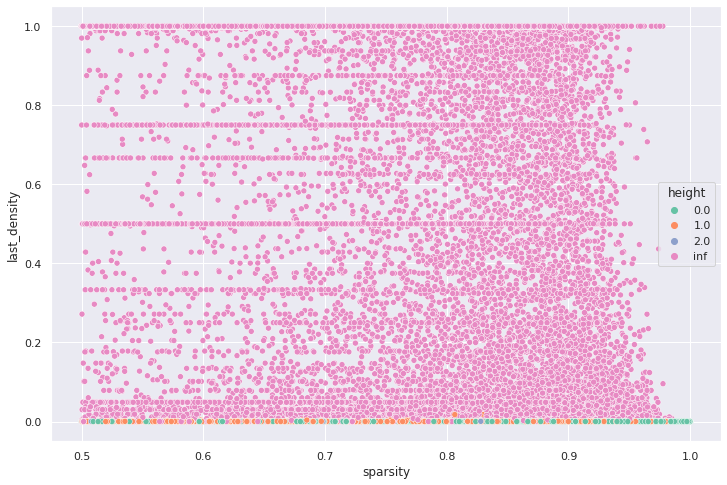

In [7]:
sns.scatterplot(data=df, x="sparsity", y="last_density", hue="height", palette="Set2")

<AxesSubplot:xlabel='sparsity', ylabel='last_count'>

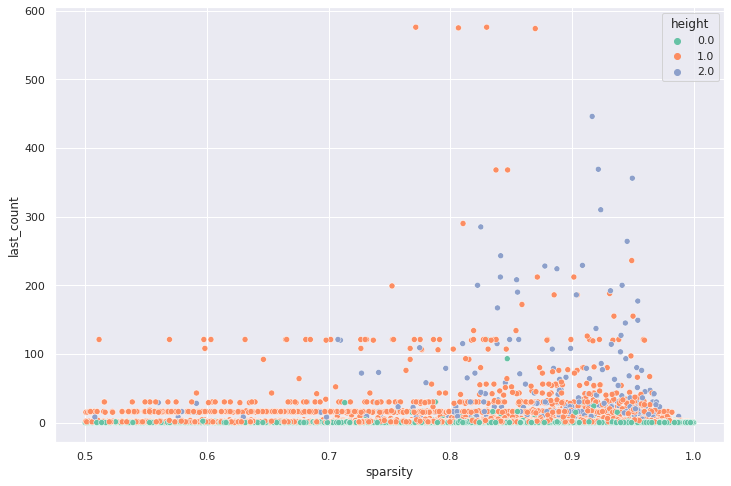

In [8]:
# sns.scatterplot(data=df, x="sparsity", y="last_count", hue="height", palette="Set2")
sns.scatterplot(data=df[df.height != float("inf")], x="sparsity", y="last_count", hue="height", palette="Set2")

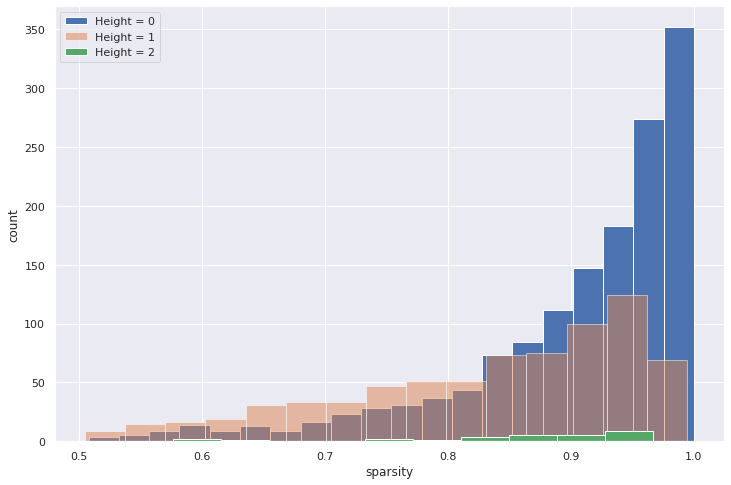

In [163]:
df[df.height == 0].sparsity.hist(label="Height = 0", bins=20)
df[df.height == 1].sparsity.hist(alpha=0.5, label="Height = 1", bins=15)
df[df.height == 2].sparsity.hist(label="Height = 2")
plt.legend()
plt.xlabel("sparsity")
plt.ylabel("count");

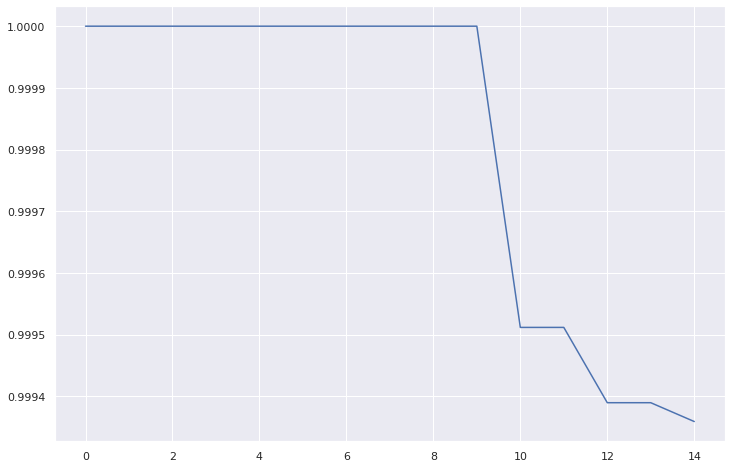

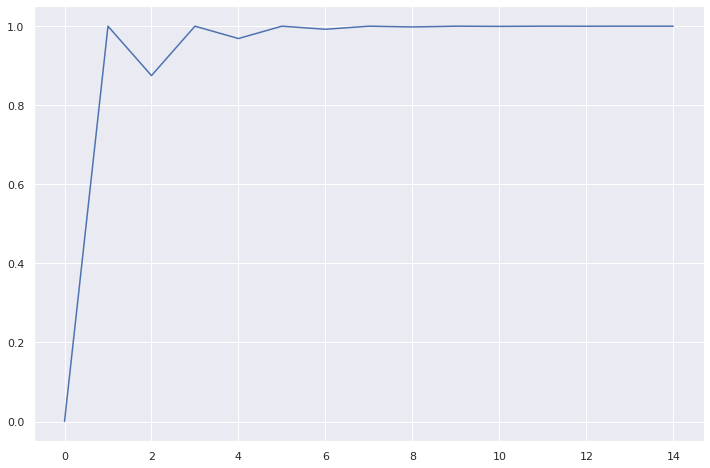

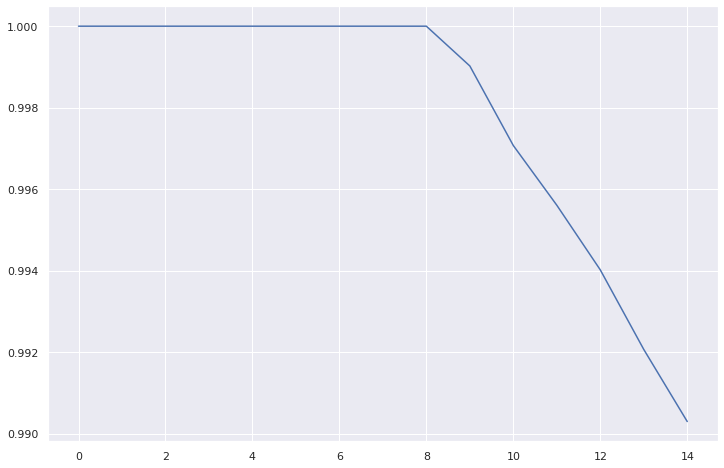

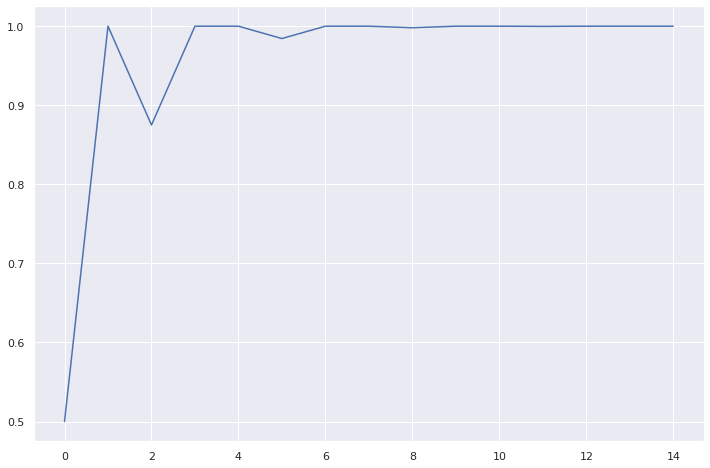

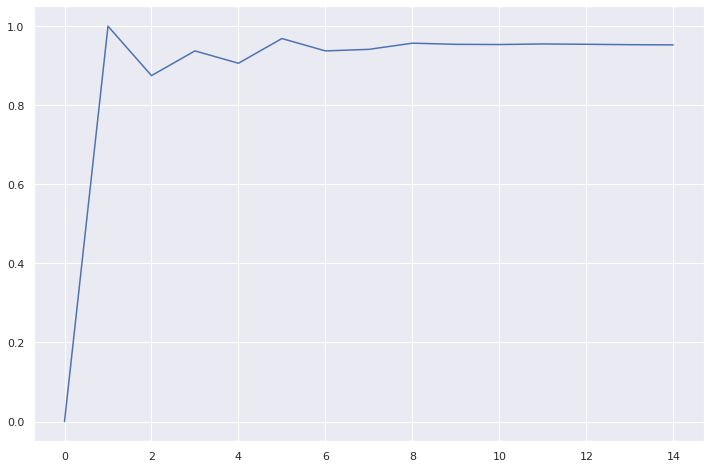

In [9]:
for row in df[(df.probably_exp == False) & (df.last_density > 0.9)].density.tolist()[:5]:
    plt.plot(row)
    plt.show()

In [11]:
df[(df.probably_exp == False) & (df.last_density > 0.9)]

,sparsity,matrix,accepted_counts,height,density,last_density,last_count,probably_exp
28,0.756143,"[[0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 0, 0, 0, 0],...","[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 204...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.999359,32747,False
647,0.621492,"[[0, 0, 1, 1, 0], [0, 0, 0, 0, 0], [1, 1, 0, 0...","[0, 4, 7, 16, 31, 64, 127, 256, 511, 1024, 204...",inf,"[0.0, 1.0, 0.875, 1.0, 0.96875, 1.0, 0.9921875...",0.999969,32767,False
794,0.909570,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, ...","[2, 4, 8, 16, 32, 64, 128, 256, 512, 1023, 204...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.990295,32450,False
799,0.920157,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, ...","[1, 4, 7, 16, 32, 63, 128, 256, 511, 1024, 204...",inf,"[0.5, 1.0, 0.875, 1.0, 1.0, 0.984375, 1.0, 1.0...",0.999969,32767,False
812,0.891646,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[0, 4, 7, 15, 29, 62, 120, 241, 490, 977, 1953...",inf,"[0.0, 1.0, 0.875, 0.9375, 0.90625, 0.96875, 0....",0.952667,31217,False
...,...,...,...,...,...,...,...,...
77937,0.691068,"[[0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0], [1, 1...","[2, 4, 8, 16, 31, 62, 123, 246, 491, 982, 1963...",inf,"[1.0, 1.0, 1.0, 1.0, 0.96875, 0.96875, 0.96093...",0.958344,31403,False
78052,0.687197,"[[1, 0, 0, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0],...","[2, 4, 8, 16, 32, 62, 122, 242, 482, 960, 1916...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.96875, 0.953125, 0...",0.933533,30590,False
78105,0.894814,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [...","[2, 4, 8, 16, 32, 64, 128, 256, 510, 1016, 202...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.996...",0.967194,31693,False
78123,0.918585,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, ...","[2, 4, 8, 16, 32, 64, 127, 253, 504, 1003, 199...",inf,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9921875, 0.98...",0.959625,31445,False


# Let's classify!

In [151]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, mean_absolute_error

In [13]:
df.matrix

0        [[0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0...
1        [[0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 0], [...
2        [[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...
3        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, ...
4        [[0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, ...
                               ...                        
78395    [[0, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0,...
78396    [[0, 0, 1], [0, 0, 0], [1, 0, 0], [0, 0, 0], [...
78397    [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, ...
78398    [[0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0], [1, 1...
78399    [[0, 0, 0, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0,...
Name: matrix, Length: 78400, dtype: object

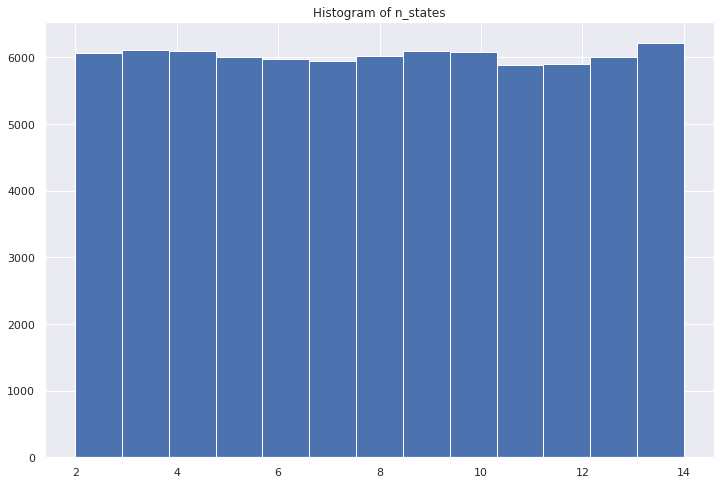

In [18]:
df.matrix.map(lambda x: x.shape[1]).hist(bins=13)
plt.title("Histogram of n_states");

In [29]:
df["X"] = df.matrix.map(lambda x: np.pad(x, [(0, 30 - x.shape[0]), (0, 14 - x.shape[1])]).ravel())

In [35]:
X_data = np.stack(df.X.to_numpy())

In [40]:
y_data = df.probably_exp.astype(int).to_numpy()

In [87]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.9, random_state=43)
skf = StratifiedKFold(n_splits=5, shuffle=True)

all_reports = []
for n_estimators in list(range(1, 11)) + list(range(20, 101, 10)):
    classifier = RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators)

    for train_index, test_index in skf.split(X_data, y_data):
        classifier.fit(X_data[train_index], y_data[train_index])
        y_preds = classifier.predict(X_data[test_index])
        y_true = y_data[test_index]
        report = classification_report(y_true=y_true, y_pred=y_preds, output_dict=True)
        report["n_estimators"] = n_estimators
        all_reports.append(report)

In [88]:
rf_df = pd.DataFrame(all_reports)

In [100]:
rf_df["macro_f1"] = rf_df["macro avg"].map(lambda d: d["f1-score"]).astype(float)

<AxesSubplot:xlabel='n_estimators', ylabel='macro_f1'>

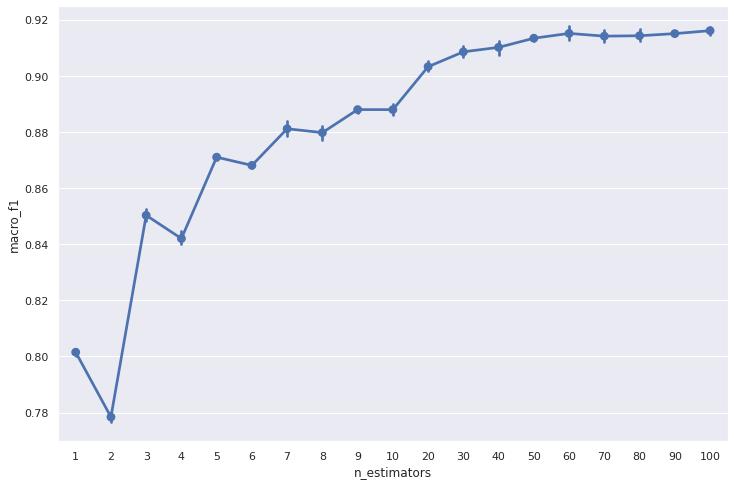

In [102]:
sns.pointplot(data=rf_df, x="n_estimators", y="macro_f1")

In [131]:
classifier = RandomForestClassifier(n_jobs=-1, n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.8, random_state=43)
classifier.fit(X_train, y_train)
df["pred_exp"] = classifier.predict(X_data)

<AxesSubplot:xlabel='sparsity', ylabel='last_density'>

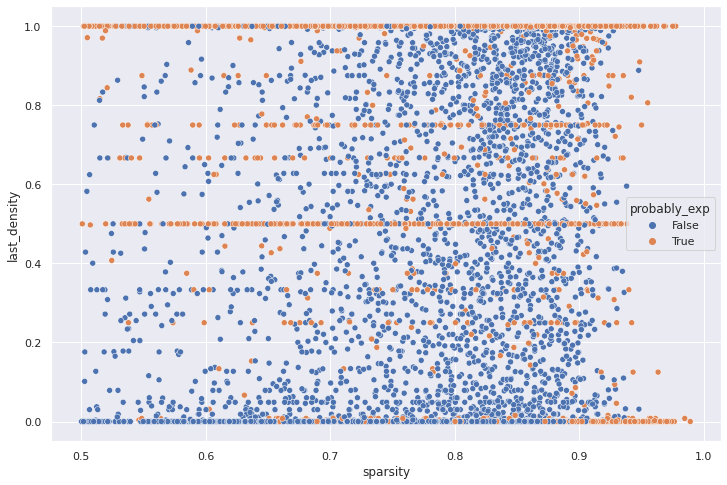

In [132]:
sns.scatterplot(data=df[df.probably_exp.astype(int) != df.pred_exp], x="sparsity", y="last_density", hue="probably_exp")

<AxesSubplot:xlabel='sparsity', ylabel='last_density'>

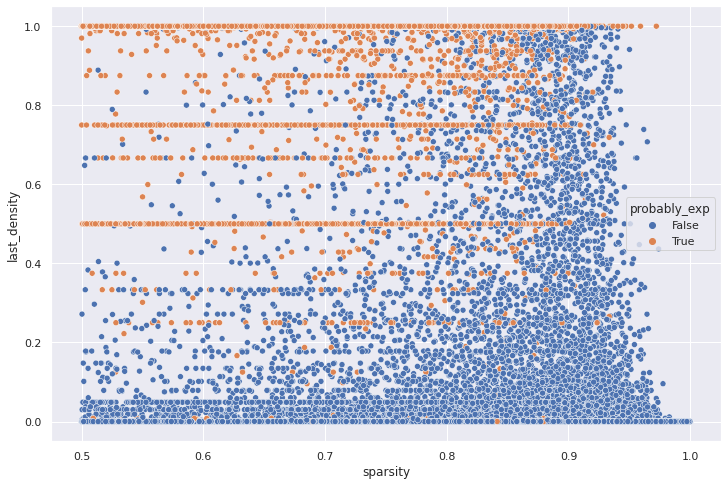

In [133]:
sns.scatterplot(data=df[df.probably_exp.astype(int) == df.pred_exp], x="sparsity", y="last_density", hue="probably_exp")

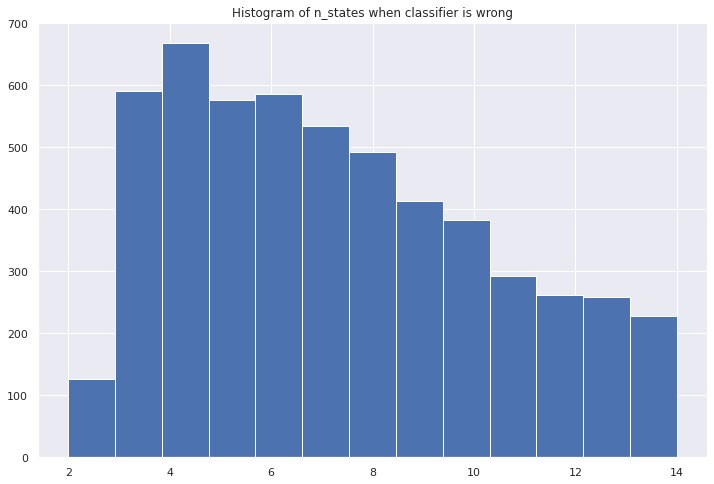

In [134]:
df[df.probably_exp.astype(int) != df.pred_exp].matrix.map(lambda x: x.shape[1]).hist(bins=13)
plt.title("Histogram of n_states when classifier is wrong");

In [143]:
y_dens_data = np.stack(df.density.map(np.asarray).to_numpy())

In [159]:
all_regression_reports = []
for n_estimators in tqdm(list(range(1, 11)) + list(range(20, 101, 10))):
    regressor = RandomForestRegressor(n_jobs=6, n_estimators=n_estimators)
    for trial in range(5):
        X_dens_train, X_dens_test, y_dens_train, y_dens_test = train_test_split(
            X_data,
            y_dens_data,
            test_size=0.2,
            random_state=abs(hash(f"{n_estimators}|{trial}")) % 2**32,
        )
        regressor.fit(X_dens_train, y_dens_train)
        y_preds = regressor.predict(X_dens_test)
        y_true = y_dens_test
        report = {"n_estimators": n_estimators}
        report["mae"] = mean_absolute_error(y_true=y_true, y_pred=y_preds)
        all_regression_reports.append(report)


100%|██████████| 19/19 [49:01<00:00, 154.83s/it]


In [161]:
df_reg = pd.DataFrame(all_regression_reports)

<AxesSubplot:xlabel='n_estimators', ylabel='mae'>

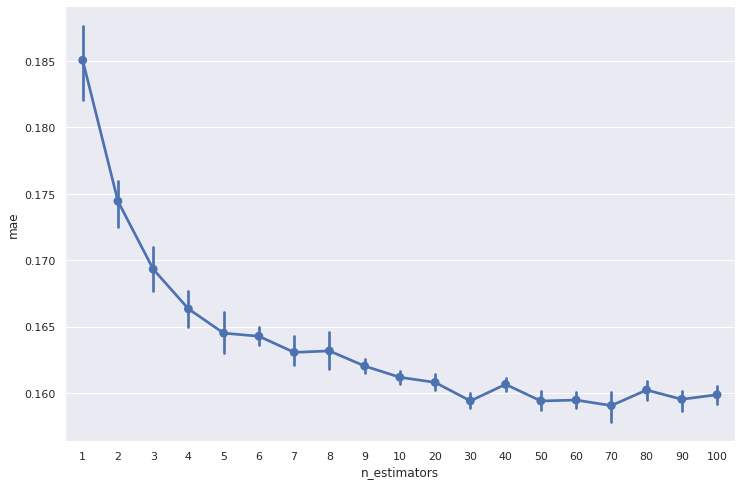

In [163]:
sns.pointplot(data=df_reg, x="n_estimators", y="mae")